# LeNet5 on MNIST
In this lab we will train a LeNet5 model on the MNIST dataset

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time

It is recommended to use the GPU for this exercise

In [0]:

use_cuda = True

if use_cuda and torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

Define a function to show images

In [0]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

### Load the MNIST dataset

In [0]:
import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),  # Normalize the dataset by subtracting the mean (0.1307) and dividing by the std (0.3081)
                                ])

trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )

batch_size = # COMPLETE HERE

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         )


0it [00:00, ?it/s]

9920512it [00:01, 8668803.89it/s]                            


Extracting ./data_mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 129992.83it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw


1654784it [00:00, 2156506.01it/s]                            
0it [00:00, ?it/s]

Extracting ./data_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw


8192it [00:00, 50194.28it/s]            


Extracting ./data_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw
Processing...
Done!


### Define the LeNet5 architecture

In [0]:
class LeNet5_convnet(nn.Module):

    def __init__(self):

        super(LeNet5_convnet, self).__init__()

        # Conv Layer 1:   28 x 28  -->    50 x 28 x 28 
        self.conv1 = # COMPLETE HERE
        
        # Max Pool 1: 50 x 28 x 28 -->    50 x 14 x 14
        self.pool1  = # COMPLETE HERE
        
        # CL2:   50 x 14 x 14  -->    100 x 14 x 14 
        self.conv2 = # COMPLETE HERE
        
        # MP2: 100 x 14 x 14 -->    100 x 7 x 7
        self.pool2 = # COMPLETE HERE
        
        # LL1:   100 x 7 x 7 = 4900 -->  100 
        self.linear1 = # COMPLETE HERE
        
        # LL2:   100  -->  10 
        self.linear2 = # COMPLETE HERE


    def forward(self, x):

        # CL1:   28 x 28  -->    50 x 28 x 28 
        x = self.conv1(x)
        x = F.relu(x)
        
        # MP1: 50 x 28 x 28 -->    50 x 14 x 14
        x = self.pool1(x)
        
        # CL2:   50 x 14 x 14  -->    100 x 14 x 14
        x = # COMPLETE HERE
        
        # MP2: 100 x 14 x 14 -->    100 x 7 x 7
        x = # COMPLETE HERE

        # LL1:   100 x 7 x 7 = 4900  -->  100 
        x = # COMPLETE HERE -- recall that you need to flatten the data before you can pass it to the dense layer!
        
        # LL2:   100  -->  10 
        x = # COMPLETE HERE
    
        return x

In [0]:
# Build the network and move its parameters to either GPU or CPU
net = # COMPLETE HERE

### Choose a loss function and learning rate

In [0]:
criterion = nn.CrossEntropyLoss()

my_lr = # COMPLETE HERE


### Train the model on the train set

In [0]:
start=time.time()

optimizer=torch.optim.SGD(net.parameters(), lr=my_lr)

for epoch in range(1,10):

  for i, (x_batch, y_batch) in enumerate(trainloader):
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used
    
    optimizer.zero_grad()  # Set all currenly stored gradients to zero 

    y_pred = net(x_batch)

    loss = criterion(y_pred, y_batch)

    loss.backward()

    optimizer.step()

    # Compute relevant metrics
    
    y_pred_max = torch.argmax(y_pred, dim=1)  # Get the labels with highest output probability

    correct = torch.sum(torch.eq(y_pred_max, y_batch)).item()  # Count how many are equal to the true labels

    elapsed = time.time() - start  # Keep track of how much time has elapsed

    # Show progress every 20 batches 
    if not i % 20:
      print(f'epoch: {epoch}, time: {elapsed:.3f}s, loss: {loss.item():.3f}, train accuracy: {correct / batch_size:.3f}')



### Evaluate the model on the test set

In [0]:
correct_total = 0

for i, (x_batch, y_batch) in enumerate(testloader):
  x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used

  y_pred = net(x_batch)
  y_pred_max = torch.argmax(y_pred, dim=1)

  correct_total += torch.sum(torch.eq(y_pred_max, y_batch)).item()

print(f'Accuracy on the test set: {correct_total / len(testset):.3f}')

Accuracy on the test set: 0.988


### Show the model's prediction for a random sample from the test set

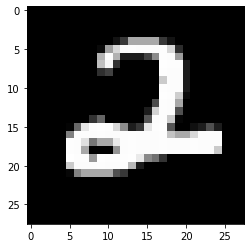

Confidence scores:
0: 3.7574809645042825e-24
1: 2.688787083275423e-22
2: 1.0
3: 1.1821116964960277e-20
4: 8.461197366268675e-22
5: 2.2272707424069712e-31
6: 1.7624264916513765e-24
7: 9.271297558664838e-18
8: 2.20136077153877e-19
9: 1.0520456117644684e-28

Label with highest confidence score: 2


In [0]:
# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0].cpu(), label_minibatch[0].cpu()

# diplay the picture
show(im.squeeze())

# feed it to the net and display the confidence scores
prob = F.softmax(net.cpu()(im.unsqueeze(0)), dim=1)

print('Confidence scores:\n' + '\n'.join(['{}: {}'.format(i, p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(torch.argmax(prob).item()))